# 1 - Exploring Property Assessment Dataset
## Getting the Data
Getting the data was quite simple. The Edmonton Open Data portal has a [Property Assessment](https://data.edmonton.ca/City-Administration/Property-Assessment-Data/q7d6-ambg) page. I've downloaded the dataset into the _**data**_ folder of this project.

## Loading the Data
Let's fire it up into pandas and check out a few data points!

In [1]:
# Enable plots in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# Seaborn makes our plots prettier
import seaborn
seaborn.set(style = 'ticks')

# Import jupyter widgets
from ipywidgets import widgets
from IPython.html.widgets import *

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

/Users/chiwang/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# Load data set
edm_data = pd.read_csv('../data/Property_Assessment_Data.csv')

In [3]:
edm_data.dtypes

Account Number        int64
Suite                object
House Number        float64
Street Name          object
Assessed Value       object
Assessment Class     object
Neighbourhood        object
Garage               object
Latitude            float64
Longitude           float64
dtype: object

Okay, pretty concise data set here. Many of these are self explanatory. I'm not quite sure what Assessment Class is or how Garage is labelled, so let's take a look at these along with Assessed Value.

## Data Exploration

Let's just see how big the data set is for now.

In [4]:
# Data set size
edm_data.shape

(387239, 10)

In [54]:
# Number of neighbourhoods
edm_data['Neighbourhood'].nunique()

394

### Assessed Value & Assessment Class

In [5]:
# Check 
edm_data['Assessed Value'].head()

0     $132000
1     $320500
2     $227000
3     $416000
4    $1184500
Name: Assessed Value, dtype: object

It looks like the Assessed Value field has dollar signs in it, causing it to be an "object" data type. Let's take these out and convert it to an integer.

In [6]:
# Replace dollar signs and cast to int
edm_data['Assessed Value'] = edm_data['Assessed Value'].str.replace('$', '').astype(int)

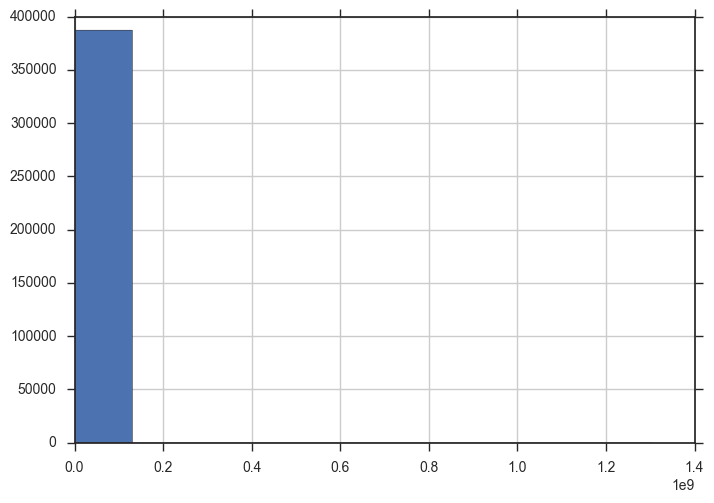

In [7]:
# Show histogram
edm_data['Assessed Value'].hist()

It looks like there are a few properties that are over... wait what haha... 1.4 BILLION DOLLARS. Let's see what they are.

In [8]:
# View the most expensive properties
edm_data.sort_values('Assessed Value', ascending = False).head(50)

,Account Number,Suite,House Number,Street Name,Assessed Value,Assessment Class,Neighbourhood,Garage,Latitude,Longitude
2242,3054384,NaN,8882.0,170 STREET NW,1303400500,Non Residential,SUMMERLEA,N,53.522335,-113.622923
25016,7012578,NaN,11404.0,89 AVENUE NW,718182500,Non Residential,UNIVERSITY OF ALBERTA,N,53.526374,-113.525764
277091,9992482,NaN,11305.0,83 AVENUE NW,545184000,Non Residential,UNIVERSITY OF ALBERTA,N,53.520437,-113.523152
248393,10091865,NaN,5015.0,111 STREET NW,468206500,Non Residential,EMPIRE PARK,N,53.485721,-113.513544
2068,10772738,NaN,1.0,KINGSWAY GARDEN MALL NW,407584000,Non Residential,SPRUCE AVENUE,N,53.562490,-113.505674
53466,4025383,NaN,11404.0,UNIVERSITY AVENUE NW,345491000,Non Residential,UNIVERSITY OF ALBERTA,N,53.517757,-113.525918
375619,1066331,NaN,10180.0,101 STREET NW,318138500,Non Residential,DOWNTOWN,N,53.542610,-113.494641
253408,10001965,NaN,10025.0,JASPER AVENUE NW,314840500,Non Residential,DOWNTOWN,N,53.540218,-113.491150
350885,3055159,NaN,10520.0,KINGSWAY NW,306177000,Non Residential,CENTRAL MCDOUGALL,N,53.557198,-113.497634
197754,3121522,NaN,9700.0,JASPER AVENUE NW,302982500,Non Residential,DOWNTOWN,N,53.542819,-113.486680


Ah, I see... that's what the Assessment Class is for... Let's see what values are in here.

In [9]:
edm_data['Assessment Class'].unique()

array(['Other Residential', 'Non Residential', 'Residential', 'Farmland'], dtype=object)

Okay, I'm really only looking for Residential buildings here. Let's filter it.

In [10]:
# Filter for only residential buildings
edm_data_res = edm_data[edm_data['Assessment Class'] == 'Residential']

In [11]:
# Review shape
print edm_data_res.shape

(363373, 10)


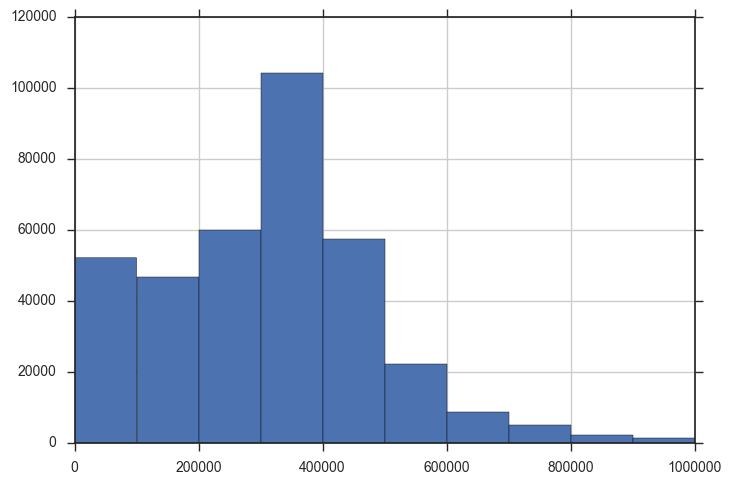

In [28]:
# Define interactive plot with interactive max xlim
def assessed_value_plot(max):
    edm_data_res['Assessed Value'].hist(range = [0, max])

# Define interaction
interact(assessed_value_plot, max = (0, 5e6))

I'm trying out the interact feature in Jupyter right now. It's quite nice! I've done a ton of dashboarding in Tableau before, but it's nice that I don't have to leave Jupyter or leave python by my side to perform this type of interaction. Tableau still allows us to filter between one graph and another, but I'm sure there's SOMETHING out there that actually allows that within Jupyter / python haha.

It looks like the large majority of the houses are under \$5M. In fact, even if we get down to \$1M, it looks like we're capturing the majority of the units:

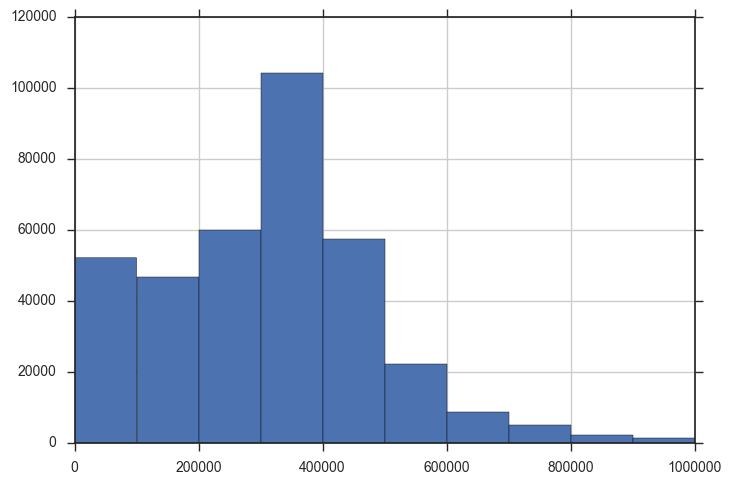

In [29]:
edm_data_res['Assessed Value'].hist(range = [0, 1e6])

If we go even further, probably 80-85% of units lie under \$500K.

### Neighbourhood
Let's see what neighbourhoods have the highest and largest ranging values.

In [44]:
# Generate statistics per neighborhood
edm_data_neighbour_grouped = edm_data_res.groupby(['Neighbourhood', 'Assessment Class']).agg({
    'Assessed Value': [np.mean, np.std, np.ptp, np.size]
}).reset_index()

In [45]:
# Show most valued neighbourhoods
edm_data_neighbour_grouped.sort_values([('Assessed Value', 'mean')], ascending = False).head(50)

Neighbourhood Assessment Class Assessed Value  \
                                                                  mean   
82               CRYSTALLINA NERA EAST      Residential   4.058000e+06   
313                        THE UPLANDS      Residential   2.974396e+06   
128                  GOODRIDGE CORNERS      Residential   2.089167e+06   
255         RIVER VALLEY FORT EDMONTON      Residential   1.693773e+06   
245                 RAMPART INDUSTRIAL      Residential   1.492417e+06   
337  WHITEMUD CREEK RAVINE TWIN BROOKS      Residential   1.427682e+06   
277                   RURAL SOUTH EAST      Residential   1.304583e+06   
210            MILL CREEK RAVINE NORTH      Residential   1.187875e+06   
241                 PYLYPOW INDUSTRIAL      Residential   1.155000e+06   
260              RIVER VALLEY KINNAIRD      Residential   1.105000e+06   
196             MAPLE RIDGE INDUSTRIAL      Residential   1.095500e+06   
68                             CASHMAN      Residential   1.014000e+06   
330                   WESTBROOK ESTATE      Residential   1.002055e+06   
319         UNIVERSITY OF ALBERTA FARM      Residential   9.693333e+05   
269                     RIVERVIEW AREA      Residential   8.794038e+05   
341                       WINDSOR PARK      Residential   8.749425e+05   
89                            DECOTEAU      Residential   8.741649e+05   
22                               ASTER      Residential   8.440000e+05   
266             RIVER VALLEY WINDEMERE      Residential   8.317500e+05   
276    RURAL NORTH EAST SOUTH STURGEON      Residential   8.286828e+05   
211            MILL CREEK RAVINE SOUTH      Residential   7.870000e+05   
106               ELLERSLIE INDUSTRIAL      Residential   7.733864e+05   
244                   QUESNELL HEIGHTS      Residential   7.565254e+05   
278                RURAL WEST BIG LAKE      Residential   7.379286e+05   
263           RIVER VALLEY TERWILLEGAR      Residential   7.375000e+05   
267                       RIVER'S EDGE      Residential   7.313929e+05   
222                            OLESKIW      Residential   7.310440e+05   
130                  GRANDVIEW HEIGHTS      Residential   7.242480e+05   
80                           CRESTWOOD      Residential   7.215839e+05   
141                    HAYS RIDGE AREA      Residential   7.067756e+05   
186             LEWIS FARMS INDUSTRIAL      Residential   7.034000e+05   
259             RIVER VALLEY HIGHLANDS      Residential   6.986111e+05   
143                  HENDERSON ESTATES      Residential   6.831062e+05   
93                            DONSDALE      Residential   6.788027e+05   
340                    WINDERMERE AREA      Residential   6.652500e+05   
323                  WEDGEWOOD HEIGHTS      Residential   6.583966e+05   
60                     CAMERON HEIGHTS      Residential   6.399888e+05   
124                            GLENORA      Residential   6.234152e+05   
129                             GORMAN      Residential   6.161429e+05   
262               RIVER VALLEY OLESKIW      Residential   6.028333e+05   
232                           PARKVIEW      Residential   5.995608e+05   
275        RURAL NORTH EAST HORSE HILL      Residential   5.982067e+05   
248                     RHATIGAN RIDGE      Residential   5.952465e+05   
221                      OGILVIE RIDGE      Residential   5.949946e+05   
182                    LAURIER HEIGHTS      Residential   5.774449e+05   
52                           BROOKSIDE      Residential   5.701916e+05   
54                      BULYEA HEIGHTS      Residential   5.616713e+05   
32                           BELGRAVIA      Residential   5.521951e+05   
342    WINTERBURN INDUSTRIAL AREA EAST      Residential   5.511667e+05   
332                          WESTRIDGE      Residential   5.506924e+05   

                                   
              std       ptp  size  
82            NaN         0     1  
313  6.655049e+06  26398000    24  
128  2.563671e+06   9323000    1

In [59]:
# Filter to get a list of neighbourhoods with less than 10 units, these are somewhat outliers
neighbourhoods_with_low_quantity_units = edm_data_neighbour_grouped[edm_data_neighbour_grouped[('Assessed Value', 'size')] <= 20]['Neighbourhood'].tolist()

In [60]:
# Check results
print 'There are {} neighbourhoods with less than 20 units'.format(len(neighbourhoods_with_low_quantity_units))
print ''
print neighbourhoods_with_low_quantity_units

There are 52 neighbourhoods with less than 20 units

['ANTHONY HENDAY CASTLEDOWNS', 'ANTHONY HENDAY CLAREVIEW', 'ANTHONY HENDAY HORSE HILL', 'ANTHONY HENDAY LAKE DISTRICT', 'BLACKMUD CREEK RAVINE', 'BROWN INDUSTRIAL', 'CASHMAN', 'CPR IRVINE', 'CRYSTALLINA NERA EAST', 'DAVIES INDUSTRIAL WEST', 'EDMONTON NORTHLANDS', 'GIRARD INDUSTRIAL', 'GOODRIDGE CORNERS', 'HAGMANN ESTATE INDUSTRIAL', 'HIGH PARK INDUSTRIAL', 'INDUSTRIAL HEIGHTS', 'KENNEDALE INDUSTRIAL', 'MILL CREEK RAVINE NORTH', 'MILL CREEK RAVINE SOUTH', 'MISTATIM INDUSTRIAL', 'MORRIS INDUSTRIAL', 'PLACE LA RUE', 'PYLYPOW INDUSTRIAL', 'RAMPART INDUSTRIAL', 'RIVER VALLEY CAMERON', 'RIVER VALLEY FORT EDMONTON', 'RIVER VALLEY GLENORA', 'RIVER VALLEY GOLD BAR', 'RIVER VALLEY HIGHLANDS', 'RIVER VALLEY KINNAIRD', 'RIVER VALLEY LESSARD NORTH', 'RIVER VALLEY OLESKIW', 'RIVER VALLEY TERWILLEGAR', 'RIVER VALLEY WALTERDALE', 'RIVER VALLEY WHITEMUD', 'RIVER VALLEY WINDEMERE', 'RURAL SOUTH EAST', 'SOUTH EDMONTON COMMON', 'SOUTHEAST (ANNEXED) INDU

In [95]:
# Show most valued neighbourhoods with greater than 20 units
most_valuable_50_neighbourhoods = edm_data_neighbour_grouped[edm_data_neighbour_grouped[('Assessed Value', 'size')] > 20].sort_values([('Assessed Value', 'mean')], ascending = False).head(50)

In [96]:
# Check result
most_valuable_50_neighbourhoods

Neighbourhood Assessment Class Assessed Value  \
                                                                    mean   
313                          THE UPLANDS      Residential   2.974396e+06   
196               MAPLE RIDGE INDUSTRIAL      Residential   1.095500e+06   
330                     WESTBROOK ESTATE      Residential   1.002055e+06   
269                       RIVERVIEW AREA      Residential   8.794038e+05   
341                         WINDSOR PARK      Residential   8.749425e+05   
89                              DECOTEAU      Residential   8.741649e+05   
22                                 ASTER      Residential   8.440000e+05   
276      RURAL NORTH EAST SOUTH STURGEON      Residential   8.286828e+05   
106                 ELLERSLIE INDUSTRIAL      Residential   7.733864e+05   
244                     QUESNELL HEIGHTS      Residential   7.565254e+05   
278                  RURAL WEST BIG LAKE      Residential   7.379286e+05   
267                         RIVER'S EDGE      Residential   7.313929e+05   
222                              OLESKIW      Residential   7.310440e+05   
130                    GRANDVIEW HEIGHTS      Residential   7.242480e+05   
80                             CRESTWOOD      Residential   7.215839e+05   
141                      HAYS RIDGE AREA      Residential   7.067756e+05   
186               LEWIS FARMS INDUSTRIAL      Residential   7.034000e+05   
143                    HENDERSON ESTATES      Residential   6.831062e+05   
93                              DONSDALE      Residential   6.788027e+05   
323                    WEDGEWOOD HEIGHTS      Residential   6.583966e+05   
60                       CAMERON HEIGHTS      Residential   6.399888e+05   
124                              GLENORA      Residential   6.234152e+05   
129                               GORMAN      Residential   6.161429e+05   
232                             PARKVIEW      Residential   5.995608e+05   
275          RURAL NORTH EAST HORSE HILL      Residential   5.982067e+05   
248                       RHATIGAN RIDGE      Residential   5.952465e+05   
221                        OGILVIE RIDGE      Residential   5.949946e+05   
182                      LAURIER HEIGHTS      Residential   5.774449e+05   
52                             BROOKSIDE      Residential   5.701916e+05   
54                        BULYEA HEIGHTS      Residential   5.616713e+05   
32                             BELGRAVIA      Residential   5.521951e+05   
332                            WESTRIDGE      Residential   5.506924e+05   
252                          RIO TERRACE      Residential   5.421713e+05   
192                      MAGRATH HEIGHTS      Residential   5.394867e+05   
72                              CHAMBERY      Residential   5.351163e+05   
178                            LANSDOWNE      Residential   5.296115e+05   
102  EDMONTON ENERGY AND TECHNOLOGY PARK      Residential   5.233866e+05   
173                KINOKAMAU PLAINS AREA      Residential   5.219180e+05   
202                             MCKERNAN      Residential   5.185591e+05   
167                         KESWICK AREA      Residential   5.123614e+05   
238                        POTTER GREENS      Residential   5.077253e+05   
318                          TWIN BROOKS      Residential   5.061478e+05   
67                          CARTER CREST      Residential   4.999590e+05   
45                    BLUE QUILL ESTATES      Residential   4.847956e+05   
322                        WEBBER GREENS      Residential   4.523567e+05   
184                                LEGER      Residential   4.508813e+05   
57                             CALLAGHAN      Residential   4.492133e+05   
114                     FALCONER HEIGHTS      Residential   4.490263e+05   
300                           STRATHEARN      Residential   4.432999e+05   
199                            MAYLIEWAN      Residential   4.414277e+05   

                                   
              std       ptp  size  
31

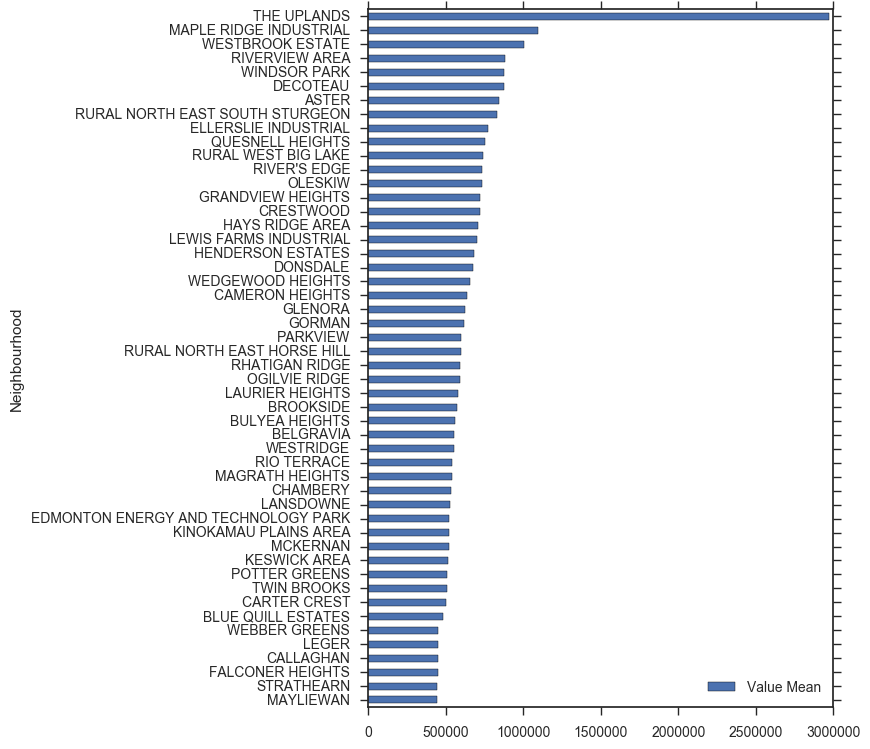

In [123]:
# Take a copy of the top 50 neighbourhoods so we can graph
most_valuable_50_neighbourhoods_bar = most_valuable_50_neighbourhoods.copy(deep = True)
most_valuable_50_neighbourhoods_bar.columns = most_valuable_50_neighbourhoods_bar.columns.droplevel(-1)
most_valuable_50_neighbourhoods_bar.columns = ['Neighbourhood', 'Assessment Class', 'Value Mean', 'Value STD', 'Value Range', 'Units']

# Plot
most_valuable_50_neighbourhoods_bar.plot.barh(x = 'Neighbourhood', y = 'Value Mean', figsize = (6, 9)).invert_yaxis()

The fact that I have to go down to Grandview Heights and Crestwood to even have heard of some of these communities means either I'm not rich enough or clearly I have not been around the city enough haha. None of the places I've ever lived is on here, to nobody's surprise haha. Would be nice to look at these places on a map eventually.

### Garage
Just want to take a look at the quick distributions of garage real quick.

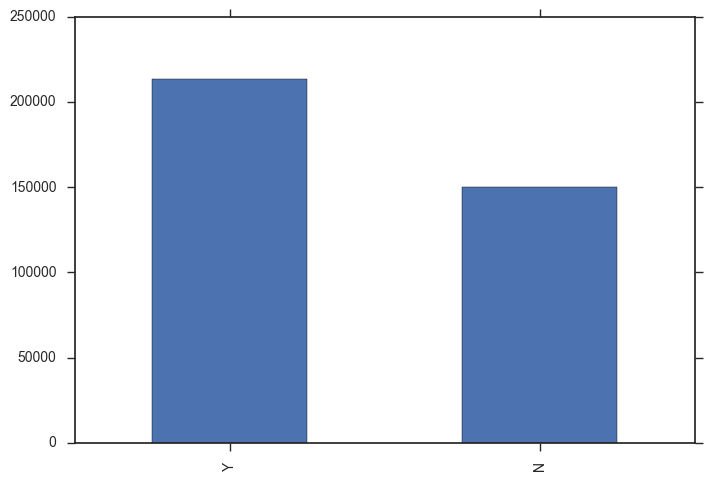

In [124]:
edm_data_res['Garage'].value_counts().plot.bar()

Ok, this doesn't really tell me anything, but that's fine. There are houses and apartments in here, so I haven't done enough research yet to understand the distributions there and how it correlates to having garages or not. Either way, we likely will not be needing the garage information anyways.

## Conclusion
Ok, I think that's about as far as I can get without actually looking at a map at this point. I'm probably most curious about just where the most valuable neighbourhoods are, so I might try to map that in the next post.